In [2]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
col = ['k', 'b', 'r', 'g', 'tab:orange', 'm']
mar = ['o', '^', 'v', 's', 'D']

import RPDM

path_data = 'data_kol_1/'
if not os.path.exists(path_data):
    os.mkdir(path_data)
else:
    print(f'WARNING: Directory {path_data} already exists')

In [3]:
Temp = 450
L_bl = 7 * 10**(-6)
A_bl = 1.83 * 10**(-10) * 0.01
b_2 = -4011 * 100
V = 0.56
d_dl = 1 * 10**(-9)
C_bl = 9.58 * 10**(-14)
M_FeCr2O4 = 224 * 0.001
M_O = 16 * 0.001
rho_FeCr2O4 = 4.8 * 1000
e = 1.6 * 10**(-19)
k = 1.38 * 10**(-23)

Om = M_O/rho_FeCr2O4
delta_phi = 0.01 * V
delta_phi_2 = V * d_dl/L_bl

print(Om, -b_2*L_bl, 2*e*delta_phi/k/Temp, 2*e*delta_phi_2/k/Temp)
print(A_bl * np.exp(b_2*L_bl))
k2_0 = A_bl/Om*np.exp(b_2*L_bl - 2*e*delta_phi_2/k/Temp)
print(k2_0)
print(Om*k2_0, C_bl)
print(C_bl/Om)

3.3333333333333333e-06 2.8077 0.2885668276972626 0.004122383252818038
1.1042883052780334e-13
3.2992361278306076e-08
1.0997453759435359e-13 9.58e-14
2.874e-08


In [4]:
Ff = 96485
e_0 = 8.85 * 10**(-12)
R = 8.314
Temp = 450

A_k = 10**(-16)

A_D = 10**(-18)

A_L = 10**(-6)

an1 = 0.2 * 10
an2 = 0.1 * 10
e_f = 10
e_dl = 10
e_cdl = 78.5
d_dl = 1e-3
d_cdl = 1e-3
D = 1
D_MV = D
D_OV = D
k1_0 = 5 * 1000   # reactive
k2_0 = 0.996 * 2.874
k3_0 = 0.9 * 2.874
k4_0 = 5 * 1000   # reactive
k5_0 = 2.874
k5 = k5_0

A_C = A_k*A_L/A_D
A_t = A_L**2/A_D
A_phi = R*Temp/Ff
phi_ext = 0.56/A_phi

print(k2_0, k3_0, k5)
print(f'{A_C:.7f}, {A_t:.5f}, {A_phi:.4f}')

L = 10
T = 50
Nx = 401
n_save = 20
Ndata = 800 # or None

id = 3
path = path_data + f'{L:.2f}_{k2_0:.2f}_{k5:.2f}_{id}/'

h = L / (Nx-1)
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2) + 1
if Ndata is not None:
    n_save = round(Nt / Ndata)
    if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)

if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

2.862504 2.5866000000000002 2.874
0.0001000, 1000000.00000, 0.0388
401 320001 802


In [5]:
R*Temp/Ff

0.03877597554023942

In [11]:
A_k = 10**(-13)
A_D = 10**(-20)
A_L = 10**(-5)

A1 = -Ff**2/e_f/e_0/R/Temp*(A_k*A_L**3/A_D)
print(A_k*A_L**3/A_D)
print(Ff**2/e_f/e_0/R/Temp)
print(A1)

1.0000000000000004e-08
2.8116017031452708e+16
-281160170.31452715


In [180]:
Ff/e_0*100*10**(-2*9)

1.0902259887005654

In [181]:
F = RPDM.Film()

F.Nx = Nx
F.n_save = n_save
F.phi_ext = phi_ext
F.L = L
F.T = T
F.D_MV = D_MV
F.D_OV = D_OV
F.k1_0 = k1_0
F.k2_0 = k2_0
F.k3_0 = k3_0
F.k4_0 = k4_0
F.k5_0 = k5_0
F.an1 = an1
F.an2 = an2
F.e_f = e_f
F.e_dl = e_dl
F.e_cdl = e_cdl
F.d_dl = d_dl
F.d_cdl = d_cdl
F.Temp = Temp
F.Ff = Ff
F.e_0 = e_0
F.R = R
F.A_k = A_k
F.A_D = A_D
F.A_L = A_L
F.A_phi = A_phi

In [182]:
c_M = np.zeros(Nx)
c_O = np.zeros(Nx)
x = np.arange(0, L+h, h)

s = int(0.2*L/h)
c_M[:s] = 3.40/x[s] * x[:s]
c_M[s:] = 3.40
c_O[:-s] = (4.20 - (4.20-3.70)/x[-s]*x[:-s])
c_O[-s:] = 3.70*(L - x[-s:])/(L-x[-s])

In [183]:
#F.init()
F.init(mode = 2, C_MV_0 = c_M, C_OV_0 = c_O)

27

In [184]:
F.solve()

0

In [185]:
# F.save_x(path)
# F.save_t(path)
# F.save_C_MV(path)
# F.save_C_OV(path)
# F.save_phi(path)
# F.save_E(path)
# F.save_k2(path)

# Visualisation

## General

In [186]:
x = F.x
t_data = F.t_data
Data_C_MV = F.Data_C_MV
Data_C_OV = F.Data_C_OV
Data_phi = F.Data_phi
Data_E = F.Data_E
Data_k2 = F.Data_k2

In [187]:
# x = np.loadtxt(path+'/x.txt')
# t_data = np.loadtxt(path+'/t_data.txt')
# Data_C_MV = np.loadtxt(path+'/Data_C_MV.txt')
# Data_C_OV = np.loadtxt(path+'/Data_C_OV.txt')
# Data_phi = np.loadtxt(path+'/Data_phi.txt')
# Data_E = np.loadtxt(path+'/Data_E.txt')
# Data_k2 = np.loadtxt(path+'/Data_k2.txt')

14.441931948787854
5.6e-05
nan nan


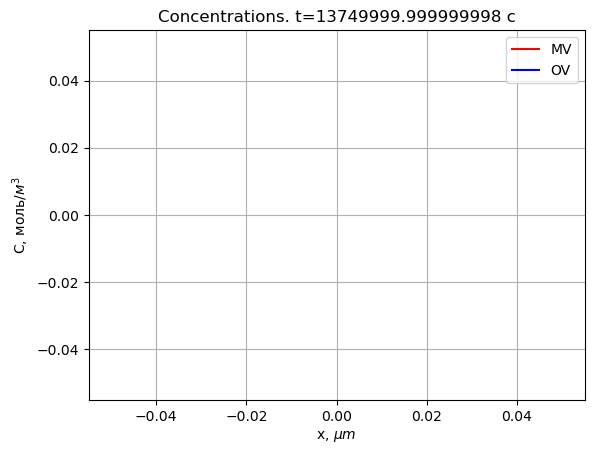

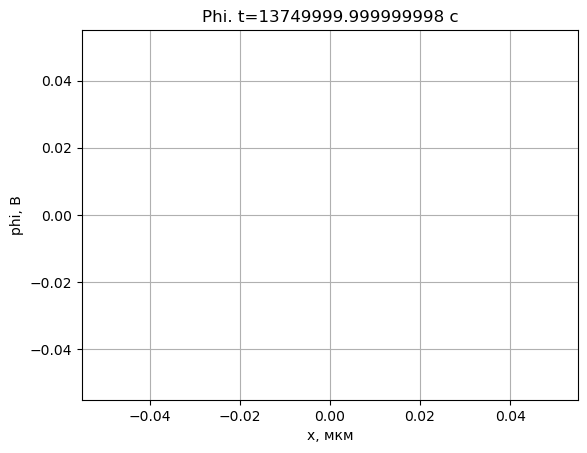

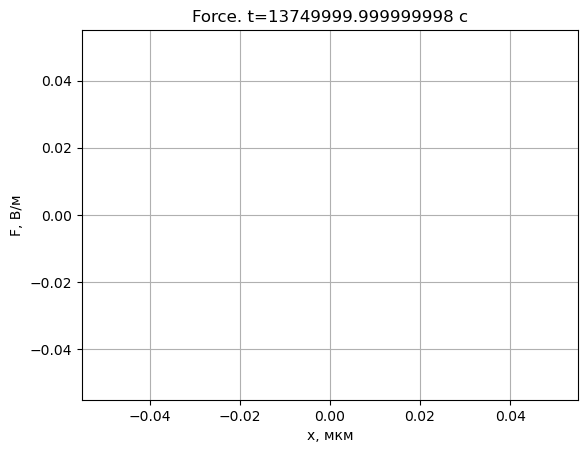

In [200]:
num = 220

print(F.phi_ext)
print(F.phi_ext*F.d_dl/F.L*A_phi)
print(F.phi_ext - Data_phi[num][0], Data_phi[num][-1])

plt.plot(x, Data_C_MV[num], 'r', label='MV')
plt.plot(x, Data_C_OV[num], 'b', label='OV')
plt.title(f'Concentrations. t={t_data[num]*A_t} c')
plt.legend()
plt.xlabel(r'x, $\mu m$')
plt.ylabel(r'C, моль/$м^{3}$')
plt.grid()
#plt.savefig(path+f'C({t[num]:.3f}).png', format='png', dpi=300)
plt.show()

plt.plot(x, Data_phi[num], 'r', label='phi')
plt.title(f'Phi. t={t_data[num]*A_t} c')
plt.xlabel('x, мкм')
plt.ylabel('phi, В')
plt.grid()
#plt.savefig(path+f'phi({t[num]:.3f}).png', format='png', dpi=300)
plt.show()

plt.plot(x[:-1], Data_E[num], 'r', label='F')
plt.title(f'Force. t={t_data[num]*A_t} c')
plt.xlabel('x, мкм')
plt.ylabel('F, В/м')
#plt.ylim([A_phi/A_L*F_min*0.95, A_phi/A_L*F_max*1.05])
plt.grid()
#plt.savefig(path+f'F({t[num]:.3f}).png', format='png', dpi=300)
plt.show()

nan


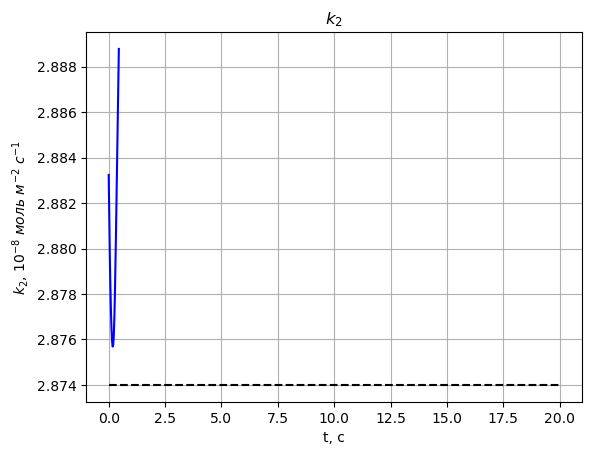

In [86]:
print(Data_k2[-1])

plt.plot(t_data, Data_k2, 'b')
plt.plot([t_data[0], t_data[-1]], [k5, k5], 'k--')
plt.xlabel('t, c')
plt.title(r'$k_2$')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
plt.grid()
#plt.savefig(path+f'k2.png', format='png', dpi=300)
plt.show()

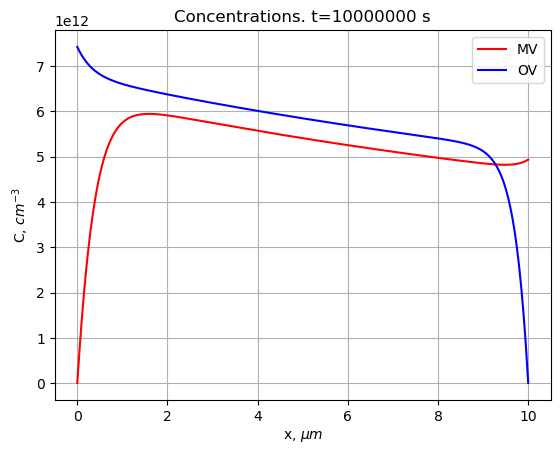

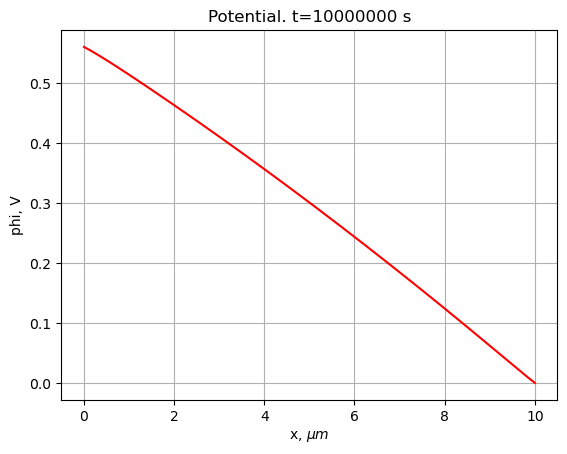

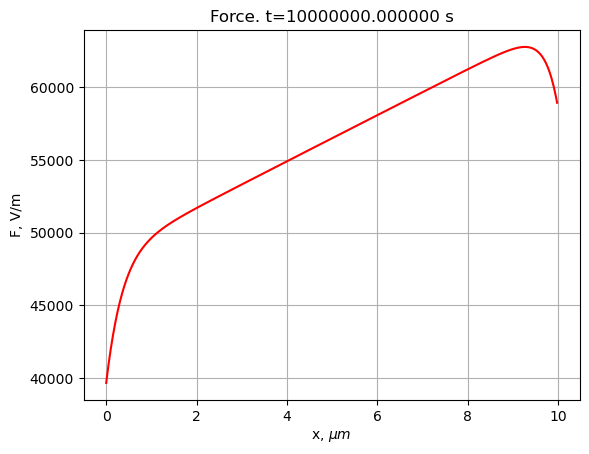

In [147]:
num = -1
plt.plot(x, Data_C_MV[num]*A_C*6.02*10**(17), 'r', label='MV')
plt.plot(x, Data_C_OV[num]*A_C*6.02*10**(17), 'b', label='OV')
plt.title(f'Concentrations. t={t_data[num]*A_t:.0f} s')
plt.legend()
plt.xlabel(r'x, $\mu m$')
plt.ylabel(r'C, $cm^{-3}$')
plt.grid()
plt.savefig(path+f'C({t_data[num]:.0f}).png', format='png', dpi=300)
plt.show()

plt.plot(x, A_phi*Data_phi[num], 'r', label='phi')
plt.title(f'Potential. t={t_data[num]*A_t:.0f} s')
plt.xlabel(r'x, $\mu m$')
plt.ylabel('phi, V')
plt.grid()
plt.savefig(path+f'phi({t_data[num]:.0f}).png', format='png', dpi=300)
plt.show()

plt.plot(x[:-1], A_phi/A_L*Data_E[num], 'r', label='F')
plt.title(f'Force. t={t_data[num]*A_t:0f} s')
plt.xlabel(r'x, $\mu m$')
plt.ylabel('F, V/m')
#plt.ylim([A_phi/A_L*F_min*0.95, A_phi/A_L*F_max*1.05])
plt.grid()
plt.savefig(path+f'F({t_data[num]:.0f}).png', format='png', dpi=300)
plt.show()

##       $k_2$ plot

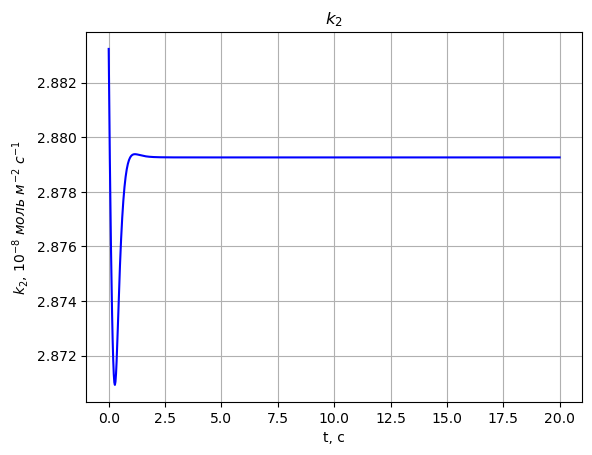

In [33]:
plt.plot(t_data, Data_k2, 'b')
plt.xlabel('t, s')
plt.title(r'$k_2$')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
plt.grid()
plt.savefig(path+f'k2.png', format='png', dpi=300)
plt.show()

## Concentrarion gifs

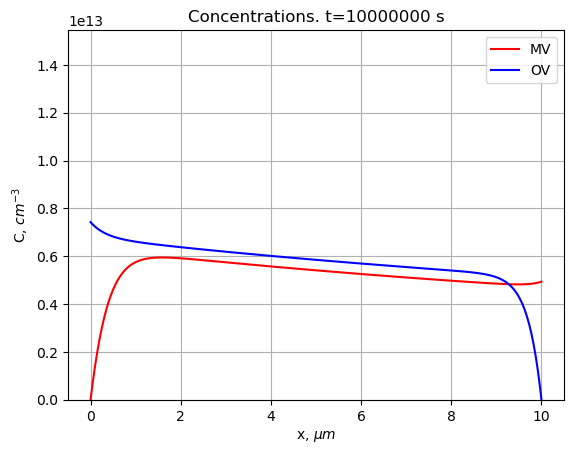

In [144]:
# Concentrarion gifs
Nt_gif = Ndata

C_max = max(np.max(Data_C_MV[:Nt_gif, :]), np.max(Data_C_OV[:Nt_gif, :]))
def update_plot(num):
    plt.cla()
    plt.plot(x, Data_C_MV[num]*A_C*6.02*10**(17), 'r', label='MV')
    plt.plot(x, Data_C_OV[num]*A_C*6.02*10**(17), 'b', label='OV')
    plt.title(f'Concentrations. t={t_data[num]*A_t:.0f} s')
    plt.legend()
    plt.ylim([0, A_C * C_max*1.1*6.02*10**(17)])
    #plt.xlim([0, L*0.1])
    plt.xlabel(r'x, $\mu m$')
    plt.ylabel(r'C, $cm^{-3}$')
    plt.grid()

fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, Nt_gif)
ani.save(path+'C.gif', writer='pillow', fps=24)

## Potential gifs

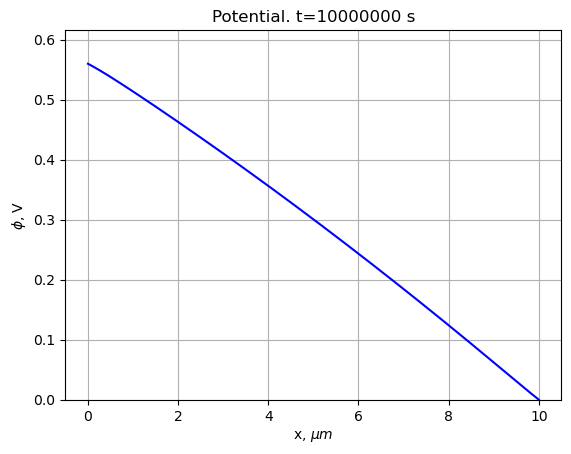

In [145]:
Nt_gif = Ndata

phi_max = np.max(Data_phi[:Nt_gif, :])
phi_min = min(0, np.min(Data_phi[:Nt_gif, :]))

def update_plot(num):
    plt.cla()
    plt.plot(x, Data_phi[num]*A_phi, 'b')
    plt.title(f'Potential. t={t_data[num]*A_t:.0f} s')
    plt.xlabel(r'x, $\mu m$')
    plt.ylabel(r'$\phi$, V')
    plt.ylim([phi_min*1.1*A_phi, phi_max*1.1*A_phi])
    plt.grid()
    
fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, Nt_gif)
ani.save(path+f'phi.gif', fps=24)

## Electric field gif

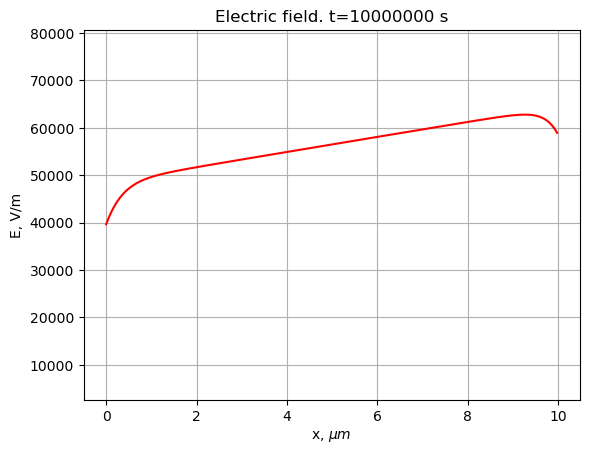

In [146]:
Nt_gif = Ndata

E_max = np.max(Data_E[:Nt_gif, :])
E_min = np.min(Data_E[:Nt_gif, :])
def update_plot(num):
    plt.cla()
    plt.plot(x[:-1], A_phi/A_L*Data_E[num], 'r', label='F')
    plt.title(f'Electric field. t={t_data[num]*A_t:.0f} s')
    plt.xlabel(r'x, $\mu m$')
    plt.ylabel('E, V/m')
    plt.ylim([A_phi/A_L*E_min*0.95, A_phi/A_L*E_max*1.05])
    plt.grid()

fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, Nt_gif)
ani.save(path+f'E.gif', fps=24)